In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('dataset_sdn.csv')
df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [3]:
df.dropna(inplace=True)
df = pd.get_dummies(df, columns=['Protocol'], drop_first=True)
df.drop(columns=['src', 'dst'], inplace=True)


In [4]:
X = df.drop('label', axis=1)
y = df['label']

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [7]:
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)


In [8]:
def evaluate_model(predictions, model_name):
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


--- Logistic Regression ---
Accuracy: 0.7647823574730355
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81     12613
           1       0.72      0.66      0.69      8155

    accuracy                           0.76     20768
   macro avg       0.75      0.75      0.75     20768
weighted avg       0.76      0.76      0.76     20768



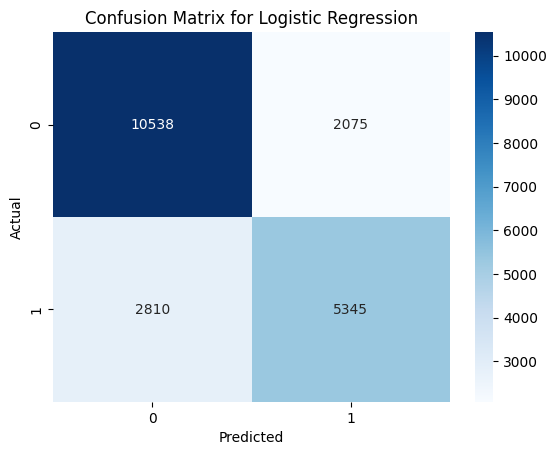

In [9]:
evaluate_model(lr_preds, "Logistic Regression")


Cross-validation accuracy: 0.8719759348588711
--- Random Forest (Reduced Complexity) ---
Accuracy: 0.9755874422187981
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     12613
           1       0.94      1.00      0.97      8155

    accuracy                           0.98     20768
   macro avg       0.97      0.98      0.97     20768
weighted avg       0.98      0.98      0.98     20768



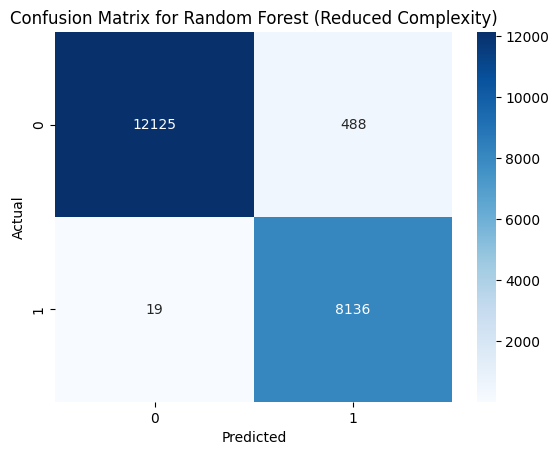

In [10]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

cv_scores = cross_val_score(rf, X_scaled, y, cv=5)
print(f"Cross-validation accuracy: {np.mean(cv_scores)}")

evaluate_model(rf_preds, "Random Forest (Reduced Complexity)")


In [11]:
feature_importances = rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]

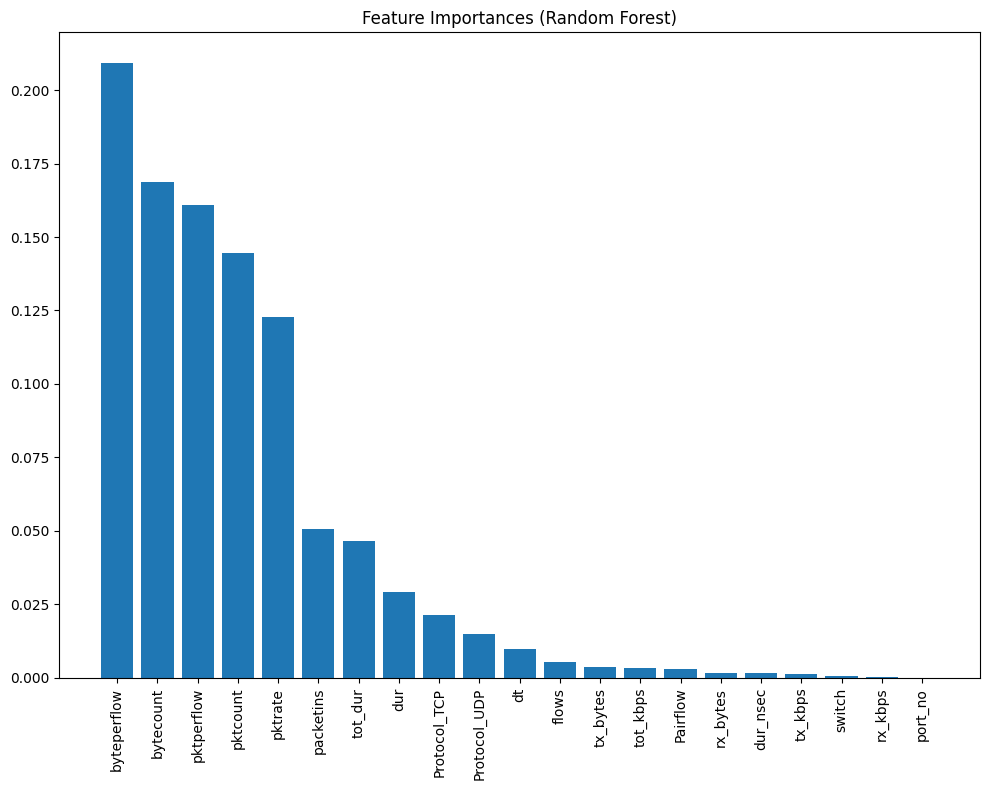

In [12]:
plt.figure(figsize=(10, 8))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [13]:

column_names = df.columns.tolist()


print(column_names)


['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label', 'Protocol_TCP', 'Protocol_UDP']
